In [1]:
# Importo libraries
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Carico il Dataset e rinomino le colonne
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data['data'], 
                  columns = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df['target']=data['target']
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
#Esplorazione
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
#Esplorazione
df.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
#Pulizia
print(df.shape)
df.drop_duplicates()
print(df.shape)

(442, 11)
(442, 11)


<AxesSubplot:>

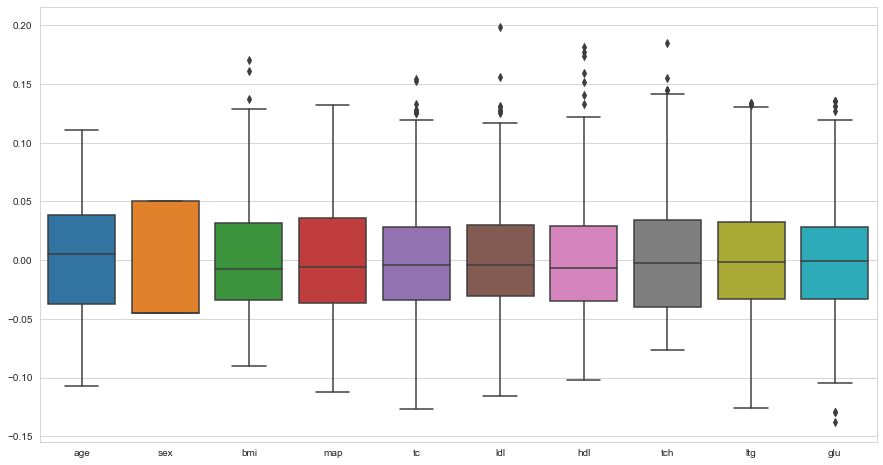

In [6]:
#Prima visualizzazione delle variabili, X,
plt.figure(figsize = (15,8))
sns.set_style("whitegrid")
sns.boxplot(data = df.iloc[:,:-1])

In [7]:
# creo IQR per fare il drop degli outliers
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 


(409, 11)


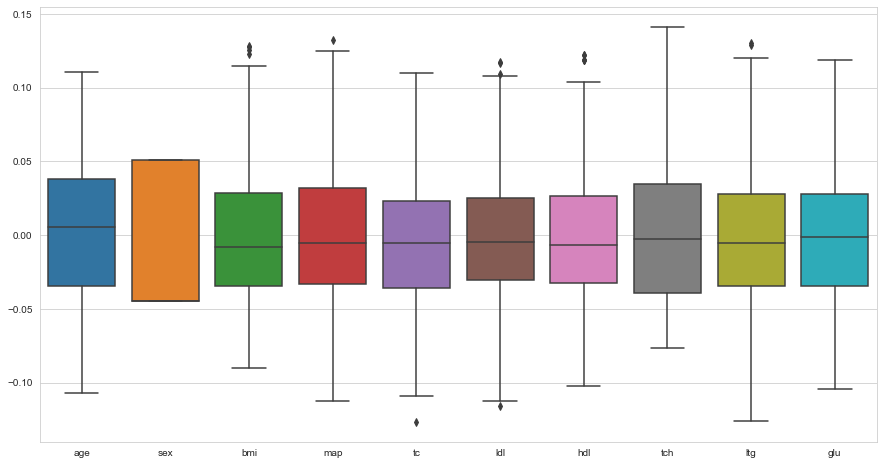

In [8]:
# Drop Outliers
df = df[~((df < (Q1 - 1.5 * IQR))).any(axis=1)] 
df = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)] 
plt.figure(figsize = (15,8))
sns.boxplot(data = df.iloc[:,:-1])
print(df.shape)

In [9]:
# Matrice di Correlazione
corr = df.corr()
corr

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.174393,0.220955,0.332076,0.294717,0.257604,-0.109625,0.252456,0.297852,0.333770,0.202772
sex,0.174393,1.000000,0.047048,0.233248,0.023560,0.134630,-0.385238,0.342593,0.137038,0.178515,0.026632
bmi,0.220955,0.047048,1.000000,0.420454,0.228632,0.220959,-0.329131,0.364599,0.435436,0.347087,0.562942
map,0.332076,0.233248,0.420454,1.000000,0.249511,0.191990,-0.169253,0.258040,0.384758,0.376297,0.442058
tc,0.294717,0.023560,0.228632,0.249511,1.000000,0.902218,0.073924,0.513400,0.478874,0.292849,0.186546
ldl,0.257604,0.134630,0.220959,0.191990,0.902218,1.000000,-0.170472,0.645477,0.287854,0.262704,0.137709
hdl,-0.109625,-0.385238,-0.329131,-0.169253,0.073924,-0.170472,1.000000,-0.750937,-0.404171,-0.233862,-0.375608
tch,0.252456,0.342593,0.364599,0.258040,0.513400,0.645477,-0.750937,1.000000,0.592622,0.348229,0.396059
ltg,0.297852,0.137038,0.435436,0.384758,0.478874,0.287854,-0.404171,0.592622,1.000000,0.414284,0.553275
glu,0.333770,0.178515,0.347087,0.376297,0.292849,0.262704,-0.233862,0.348229,0.414284,1.000000,0.334784


<AxesSubplot:>

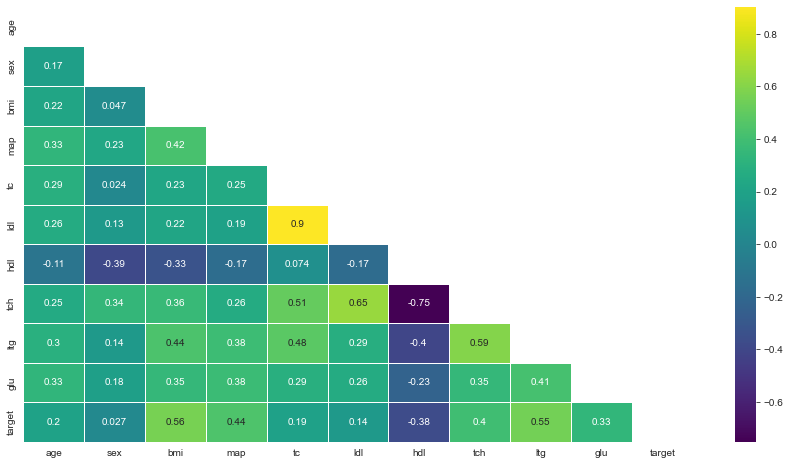

In [10]:
# Visualizzazione della correlazione
mask = np.triu(corr)
plt.figure(figsize = (15,8))
sns.heatmap(corr,annot=True,mask=mask,linewidths=.5,cmap="viridis")

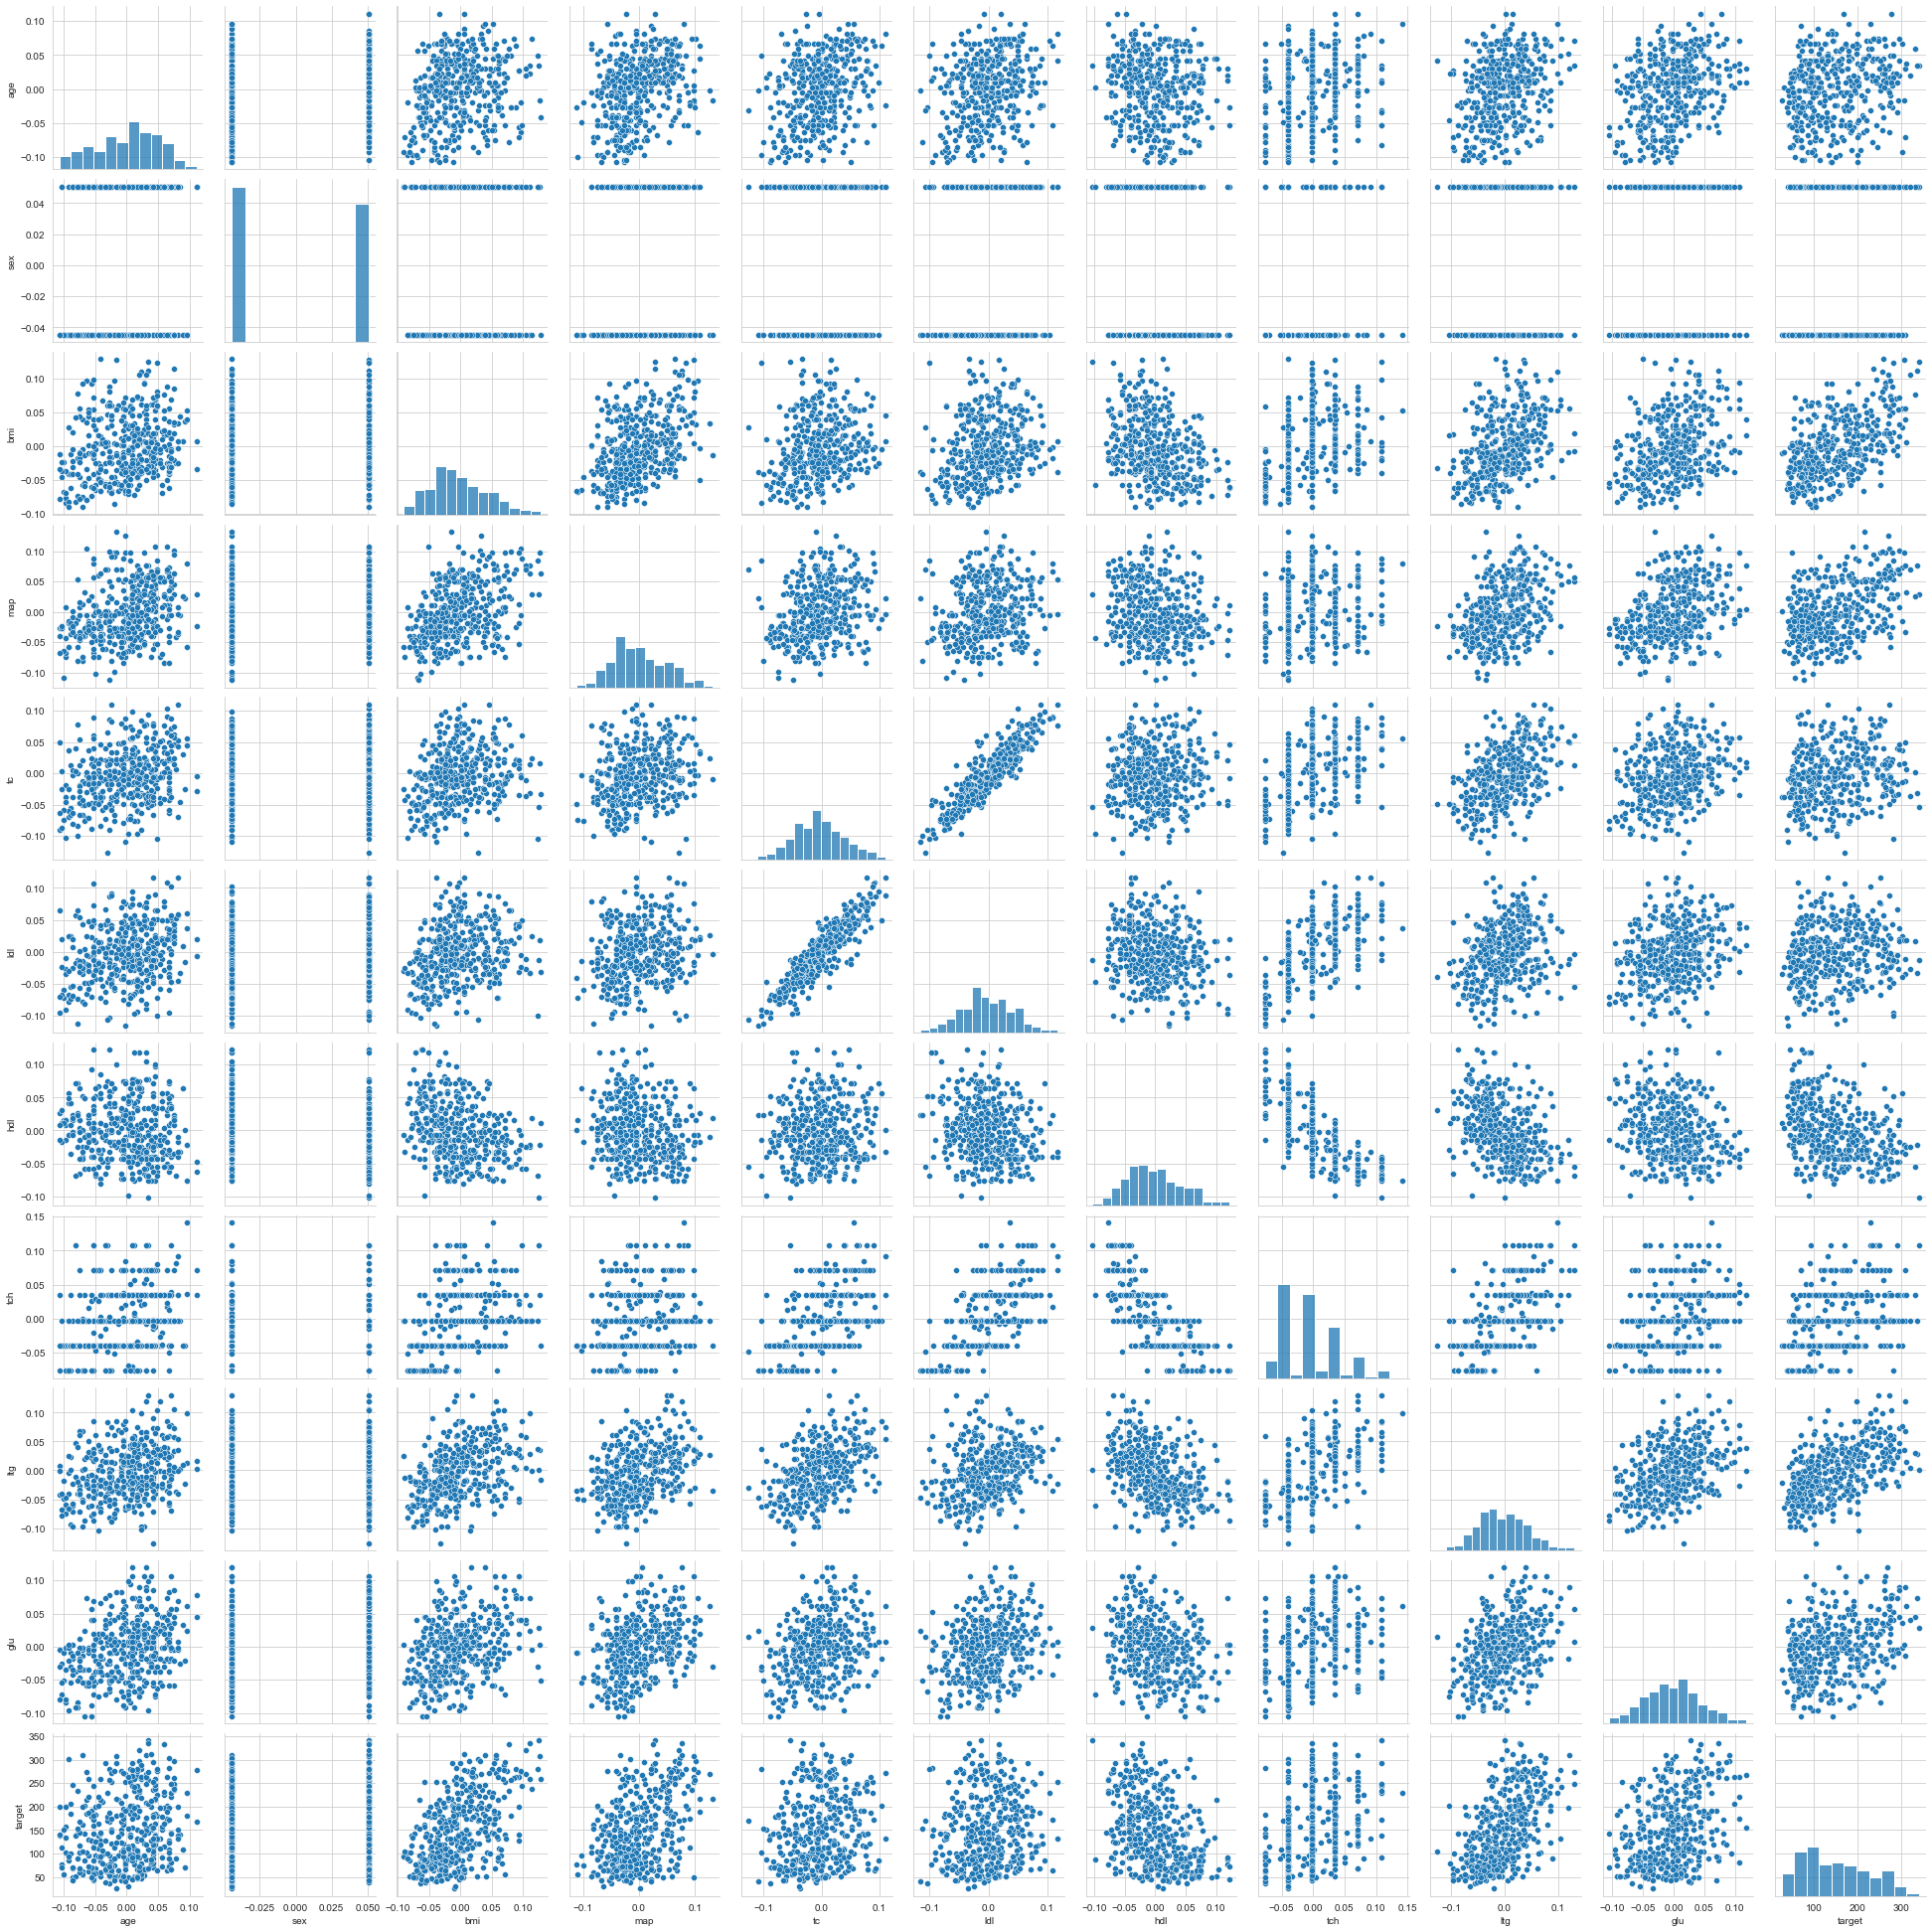

In [11]:
#Visulalizzaizone delle correlazioni
sns.pairplot(df)

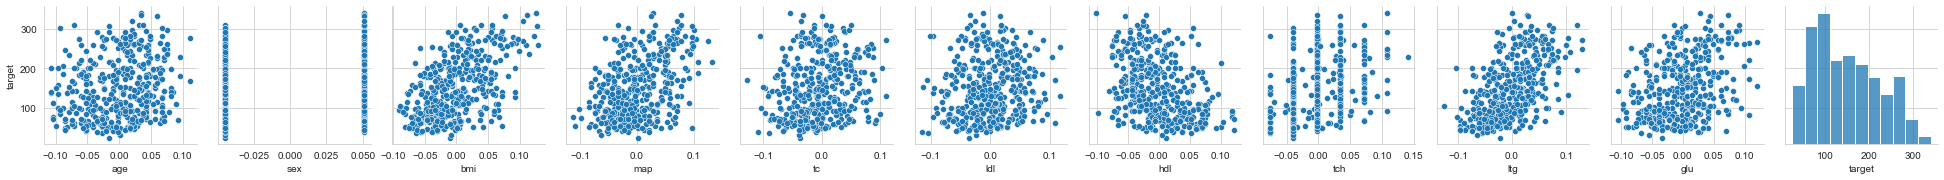

In [12]:
sns.pairplot(df, y_vars = "target")

In [13]:
# Creo una funzione che producecon i Risulati di regressione Semplice, con Cross validation a 10, 
# con Lasso + cross
# con Ridge + Cross

def regressione(df):
    Titolo = "Regressione Semplice"
    X = df.drop("target", axis =1).values
    y = df["target"].values.reshape(-1,1) 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) 

    reg = LinearRegression()
    reg.fit(X_train,y_train) 

    print(Titolo, "train score", reg.score(X_train,y_train))
    print(Titolo, "Test score", reg.score(X_test, y_test))

    #Cross Val a 10
    cross = "- CrossVal a"
    num = 10

    cv_scores = cross_val_score(reg,X,y,cv=num) 
    ris = np.mean(cv_scores)
    print(Titolo, cross, num, ":", ris)

    # Lasso CV a 5
    y = df["target"].values
    lasso = LassoCV(cv=5, random_state=0).fit(X, y)
    lasso_score = lasso.score(X, y)
    print("Lasso Score - Cross validation a 5:", lasso_score)


    # Ridge CV a 5
    ridge = RidgeCV(cv=5).fit(X, y)
    print("Ridge Score - Cross validation a 5:",ridge.score(X,y))
    print("\nCoefficienti del Lasso CV:\n", lasso.coef_)

In [14]:
# Uso la funzione
regressione(df)

Regressione Semplice train score 0.5226416691779466
Regressione Semplice Test score 0.3673119193776603
Regressione Semplice - CrossVal a 10 : 0.43828035022076123
Lasso Score - Cross validation a 5: 0.487992818013378
Ridge Score - Cross validation a 5: 0.487237734283378

Coefficienti del Lasso CV:
 [  -0.         -189.72991959  492.50199806  314.21971701   -0.
  -91.6785844  -284.3578526     0.          487.83963714   35.7193379 ]


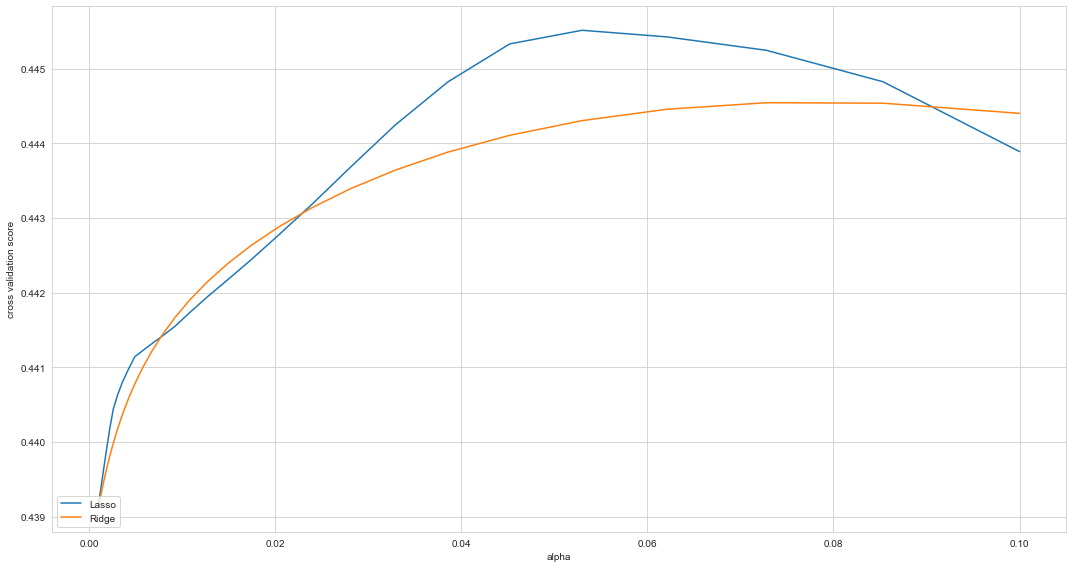

In [15]:
# Cerco l'alpha ideale per le penalità
X = df.drop("target", axis =1).values
y = df["target"].values.reshape(-1,1) 

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(15, 8))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=10).mean() for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [16]:
# Creo una copia per ulteriori lavori
df_copy = df.copy()

In [17]:
# Lascio stare le colonne sex, che non sembra influire sull target e ldl, 
# perché altamente correlata con tc, ho tenuto tc perché tc aveva una sua correlazione maggiore con Y
df = df.drop(["ldl","sex"], axis = 1)

In [18]:
df

,age,bmi,map,tc,hdl,tch,ltg,glu,target
0,0.038076,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.074108,-0.050428,-0.024960,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,0.041708,0.019662,0.059744,-0.005697,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,-0.015906,0.017282,-0.037344,-0.024993,-0.011080,-0.046879,0.015491,132.0


In [19]:
# riprovo la funzione con le colonne in meno
regressione(df)
# I risultati di precisione sono inferiori a quelli dell'analisi con tutte le variabili

Regressione Semplice train score 0.5071654482659111
Regressione Semplice Test score 0.34911741214035663
Regressione Semplice - CrossVal a 10 : 0.42632973278286307
Lasso Score - Cross validation a 5: 0.47231675647993965
Ridge Score - Cross validation a 5: 0.47087147212556735

Coefficienti del Lasso CV:
 [  -0.          528.33002064  267.20327068 -112.81967316 -152.48460859
    0.          545.48799506   16.09233755]


In [20]:
# Tolgo hdl per lo stesso principio di prima, ma inversamente correlata con tch
df = df.drop("hdl", axis = 1)

In [21]:
regressione(df)
# risultati ancora inferiori allo stato di partenza

Regressione Semplice train score 0.5070333181830872
Regressione Semplice Test score 0.35198570579498456
Regressione Semplice - CrossVal a 10 : 0.4285156904367723
Lasso Score - Cross validation a 5: 0.47202514155662967
Ridge Score - Cross validation a 5: 0.4702494478545697

Coefficienti del Lasso CV:
 [  -1.10246103  541.57814234  268.3181078  -208.00007525  130.37927857
  568.25714744   21.51897101]


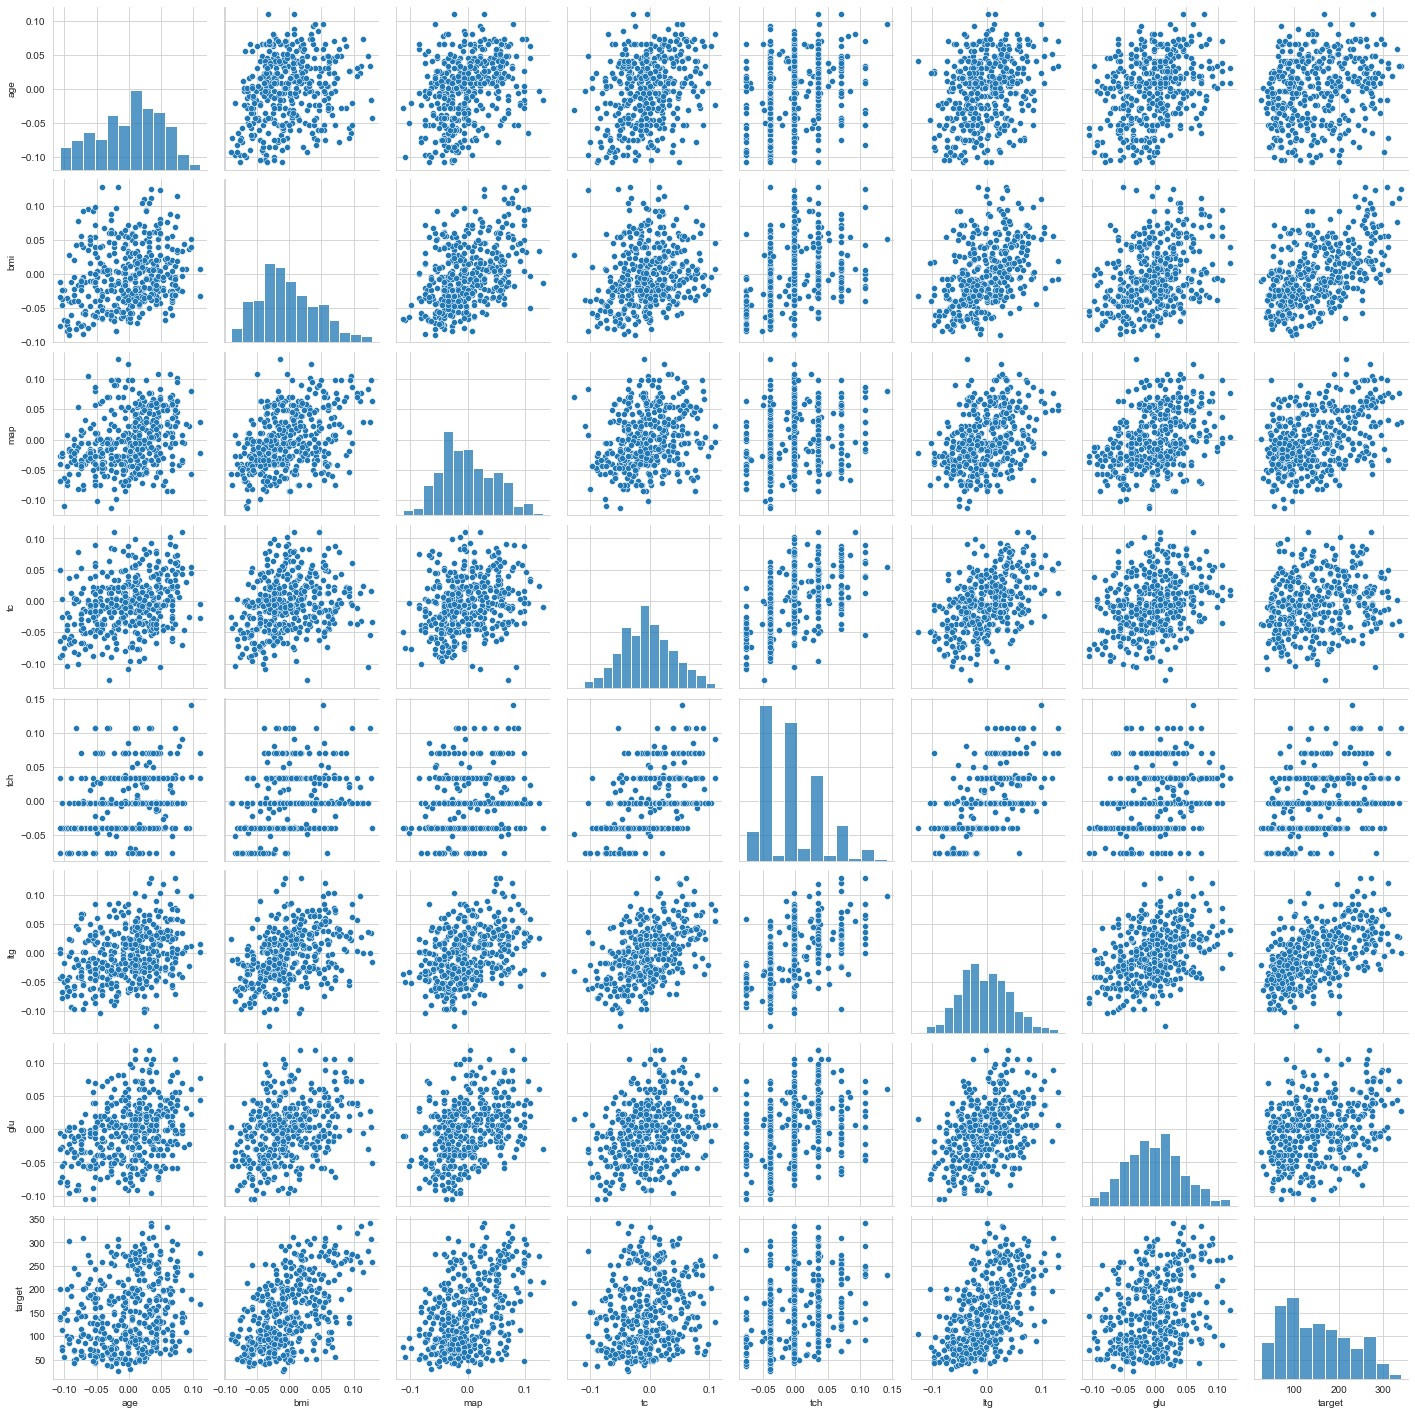

In [22]:
sns.pairplot(df)

In [23]:
# Dal pair plot vedo che age forma una nuvola ed anche tc quindi le toglo 
# visto che sono poco correlate col Y
df = df.drop(["age","tc"], axis = 1)

In [24]:
regressione(df)
#Risultati inferiori al modello di partenza

Regressione Semplice train score 0.4870947998925891
Regressione Semplice Test score 0.34400571142098124
Regressione Semplice - CrossVal a 10 : 0.4161080376452778
Lasso Score - Cross validation a 5: 0.4557790023031768
Ridge Score - Cross validation a 5: 0.45446531730791717

Coefficienti del Lasso CV:
 [547.80249189 250.55881138  49.75409421 517.56939703   2.03723   ]


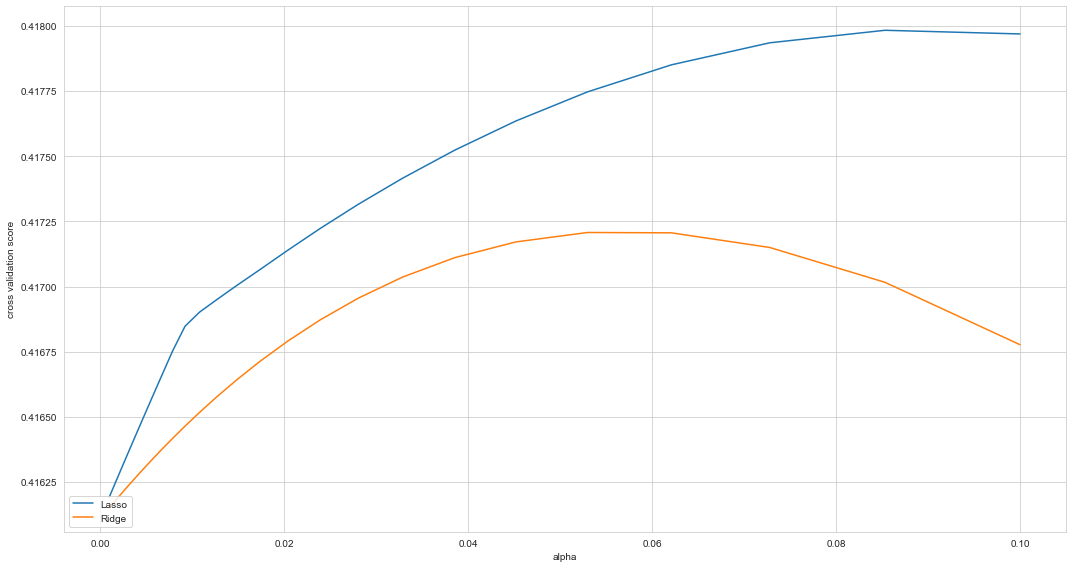

In [25]:
# Cerco l'alpha ideale
X = df.drop("target", axis =1).values
y = df["target"].values.reshape(-1,1) 

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(15, 8))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=10).mean() for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [26]:
#Studio Polinomiale, con vari gradi di polinomio tanute PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn import metrics

Titolo = "Polinomiale Semplice"
X = df_copy.drop("target", axis =1).values
y = df_copy["target"].values.reshape(-1,1) 

for i in range(1,11):
    print("\n" + "#"*20, f"Polinomio grado:{i}")
    
    poly = PolynomialFeatures(degree=i)
    poly_features = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=0) 

    reg = LinearRegression()
    reg.fit(X_train,y_train) 
    
    poly_reg_y_predicted = reg.predict(X_test)
    poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
    print(poly_reg_rmse)
    print(metrics.r2_score(y_test, poly_reg_y_predicted))

#Sembra che il miglior risultato sia un polinomio di grado 1 quindi una regressione lineare


#################### Polinomio grado:1
56.06899634660306
0.36731191937766006

#################### Polinomio grado:2
92.77107062395824
-0.7320850995086903

#################### Polinomio grado:3
3490.9599328244417
-2451.6400570322594

#################### Polinomio grado:4
217.78334389378858
-8.545384169979368

#################### Polinomio grado:5
216.60404552246854
-8.44228741495206

#################### Polinomio grado:6
216.60616118821082
-8.4424718696932

#################### Polinomio grado:7
216.60585025781066
-8.442444761051103

#################### Polinomio grado:8
216.60585205544092
-8.4424449177784

#################### Polinomio grado:9
216.60585199106265
-8.442444912165547

#################### Polinomio grado:10
216.50213854059078
-8.433404767760766


In [27]:
# Comparo il risultato con la RMSE e Rquadro(score)
X = df_copy.drop("target", axis =1).values
y = df_copy["target"].values.reshape(-1,1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
print(lin_reg_rmse)
print(metrics.r2_score(y_test, lin_reg_y_predicted))
print(cross_val_score(lin_reg_model,X,y,cv=10).mean())


53.43487846731138
0.5374511635959798
0.43828035022076123


In [28]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
